# Introduction

One of the fundamental goals of biology is to observe and explain the diversity among Earth's organisms. Early naturalists like Lamarck and Darwin introduced Evolution as the process which brings about changes in organisms over time. Equipped with recent knowledge of DNA, we can now identify, study and quantify genetic variants which forms the basis of evolution. 

There are four basic forces of Evolution:

1. Mutation
2. Genetic Drift
3. Natural Selection
4. Gene Flow

For the purpose of this assignment, I will illustrate the first three phenomena with examples and show how changes in each can affect the genetic diversity within a population. Following the illustration, I will discuss the Hudson's $F_{st}$ statistic which helps to quantify the diversity between populations. Some genetics related terms used in this assignment are also defined in the final section of this notebook. 

# Importing Modules

*All simulations are carried out in a python environment using publicly available software/modules* 

The modules required for this demonstration are:

1. scikit-allel
2. numpy


**Please note that python has 0-based indexing and I am going to follow that throughout the assignment.** 

In [1]:
import allel 
import numpy as np 

import helper as hp #helper module with self-written functions

np.random.seed(7)

# Basic Forces of Evolution

## Mutation

A mutation is any change in the [DNA](#tag1) sequence of an organism. It can be caused by a deletion or an insertion of [genes](#tag2) or even by a single nucleotide polymorphisms ([SNPs](#tag3)). 

For our purposes, let's say we have preselected 5 fixed genes in the human [genome](#tag7) and we wish to study mutations in these 5 genes. We have 10 different individuals in our population. Since they are all [diploid](#tag4), each gene will have 2 copies. Let's also imagine that we are at a point in time where there is no diversity between the individuals at these specific positions. We can represent our situation as a three dimensional array where the first, second and third dimensions correspond to the number of variants under study, number of individuals and the ploidy of the species respectively. Scikit-allel module helps us visualize in a smarter way as shown below. Its called the Genotype Array of a population. 

In [2]:
shape = n_variants, n_individuals, ploidy = 5, 10, 2
data = np.zeros(shape, dtype='i1')
g0 = allel.GenotypeArray(data, copy=False)
g0

,0,1,2,3,4,5,6,7,8,9
0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


Here, the rows represent the [genetic variants](#tag5) or the specific genes under study, the columns represent the individuals and the values represent the [allele](#tag9) at both chromosomes separated by a "/". In our case, since we do not have any diversity yet, all values are represented by 0. 

We can use the [pairwise distance](#tag8) metric to get an idea of the diversity in the population. Scikit-allel helps us visualize this diversity through a pairwise distance matrix where each element of the matrix corresponds to the pairwise distance between the individuals given in the row and the column of the matrix. We have defined a function in our helper module that will not only output the pairwise distance matrix but also print the mean pairwise distance between all individuals in the population. 

The mean pairwise distance within the population is 0.0


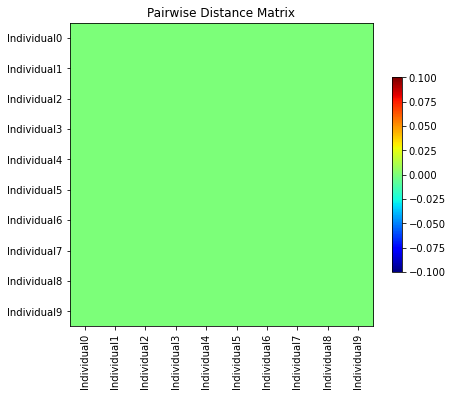

In [3]:
hp.get_pairwise_dist(g0)

As we can see from the above plot, there is absolutely no difference between individuals as the mean pairwise distance is 0 as reflected in our matrix where all the pairwise distances between individuals is 0.   

Now, we can introduce random mutations in our dataset. We allow only two alleles per variant denoted by either a 0 which was the original variant or a 1, a new variant that can arise due to mutation. Such mutations can occur at any variant position in any individual at any chromosome. Mutations can also result in genes switching back and forth between the 0 and 1 state. I have simulated 100 generations that may or may not result in such a random mutation. Please note that after each generation, the number of individuals always remains the same. So even if a new individual is born with or without mutation, an old individual will have to die to make way for the new one.   

In [4]:
# Introduce a mutation at any random variant 
# of any random individual at any random chromosome 

datam1 = data.copy()

for i in range(100):
    for idx1,idx2,idx3 in np.random.randint([0,0,0],[5,10,2],(1,3)):
        datam1[idx1,idx2,idx3] = np.random.randint(0,2) 

After the mutation event, we can view the genetype array of the current population to see how it got affected.

In [5]:
gmutated = allel.GenotypeArray(datam1, copy=False)
gmutated

,0,1,2,3,4,5,6,7,8,9
0,1/1,1/1,0/0,1/0,0/1,0/1,0/1,0/0,0/0,0/1
1,0/0,0/0,0/0,1/0,0/1,0/1,1/0,0/0,1/0,0/1
2,1/0,0/1,0/1,1/0,1/0,1/1,1/0,0/0,0/0,0/0
3,1/0,0/1,0/0,0/0,0/1,0/0,0/0,1/1,0/1,0/0
4,1/0,0/0,0/0,0/1,0/1,1/0,0/1,1/0,0/1,0/0


As we can see above, the simulation has randomly inserted mutations at some variants of one or two chromosomes of some individuals. We can now visualize the diversity using the pairwise distance matrix. 

The mean pairwise distance within the population is 3.24


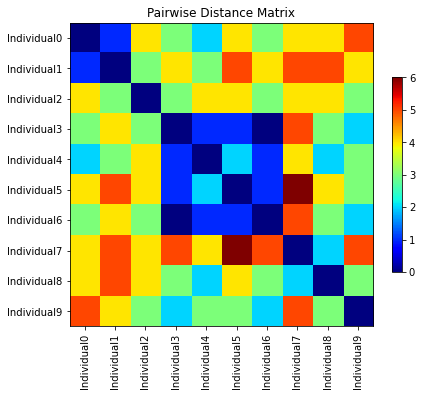

In [6]:
hp.get_pairwise_dist(gmutated)

We can clearly see above that the mutations have resulted in a much more diverse pattern in the pairwise distance matrix. Thus we can say that the genetic diversity has **increased** within the population. While previously the distance value was stuck at 0 among all individuals, in this case we can clearly see it has increased and has a range between 0 to 6. 

*Please note that the diagonal of this matrix should always be zero since there is no diversity among the variants of the same individual.* 

## Genetic Drift

Genetic Drift is an evolutionary mechanism by which the allele frequency changes by chance. Founder Effect is an example of genetic drift that happens when a certain group of individuals in a population decides to break off from a population and migrate to a different place, thus creating two subpopulations. 

As an example, suppose among the 10 individuals presented above, three wanted to migrate to a different place. This will result in the creation of two subpopulations, $S_1$ and $S_2$ each having their own [gene pool](#tag6). Let the 6th, 7th and 8th individual decide to migrate elsewhere. The 7 remaining individuals can be represented as follows:

In [7]:
subpops = [[0, 1, 2, 3, 4, 5, 9], [6, 7, 8]]

The genotype array of the first subpopulation, $S_1$ is given below.

In [8]:
S1 = gmutated.subset(sel1=subpops[0])
S1

,0,1,2,3,4,5,6
0,1/1,1/1,0/0,1/0,0/1,0/1,0/1
1,0/0,0/0,0/0,1/0,0/1,0/1,0/1
2,1/0,0/1,0/1,1/0,1/0,1/1,0/0
3,1/0,0/1,0/0,0/0,0/1,0/0,0/0
4,1/0,0/0,0/0,0/1,0/1,1/0,0/0


We can take a look at the new diversity matrix of the population $S_1$.

The mean pairwise distance within the population is 3.05


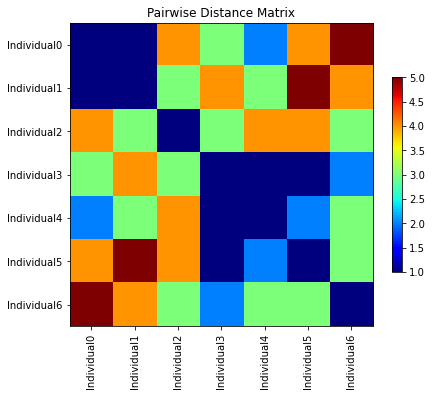

In [9]:
hp.get_pairwise_dist(S1)

We can see above that the genetic diversity within the population has **decreased** in this case as the mean paiwise distance value has gone down and maximum diversity has also gone down from 6 to 5 as can be seen in the colorbar.

## Natural Selection - Positive Selection

Positive Selection is a type of natural selection that favours an allele because it turns out to be beneficial to the individuals of a population in a specific environment. 

Let's say the environment where population $S_1$ lives in favours the 0th allele for genetic variants 0,1,2 and 3 with a very high selection coefficient. We will simulate 100 generations where due to selective pressure, the 0th allele at variants 0, 1, 2 and 3 stays on with a probability of 0.95 while the 1 stays with a 0.05 probability. 

In [10]:
datam2 = S1.values.copy()

for i in range(100):
    for idx1,idx2,idx3 in np.random.randint([0,0,0],[4,7,2],(1,3)):
        datam2[idx1,idx2,idx3] = np.random.choice([0,1],size=1,p=[0.95,0.05])

The genotypic array of the population $S_1$ after positive selection is given below.

In [11]:
S1_positive = allel.GenotypeArray(datam2, copy=False)
S1_positive

,0,1,2,3,4,5,6
0,0/1,0/0,0/0,0/0,0/0,0/1,1/0
1,0/0,0/0,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,1/0,0/1,0/1,0/0,0/1,0/0,1/0
4,1/0,0/0,0/0,0/1,0/1,1/0,0/0


The mean pairwise distance and the pairwise distance matrix of the population $S_1$ is given below. 

The mean pairwise distance within the population is 1.62


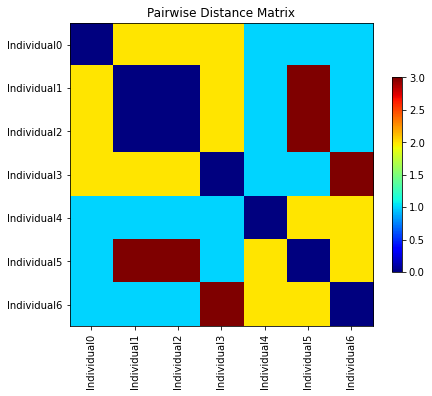

In [12]:
hp.get_pairwise_dist(S1_positive)

We can see that the genetic diversity within population **decreased** due to strong positive selection from the above pairwise distance matrix and the mean population pairwise distance score.  

## Natural Selection - Purifying Selection

Some mutations can be harmful to fitness which results its selective removal. This process is called Purifying Selection or Negative Selection. 

Let's consider the second population which migrated in our illustration of genetic drift. When they moved, the genetic diversity within the population can be visualized using the pairwise distance matrix.

In [13]:
S2 = gmutated.subset(sel1=subpops[1])
S2

,0,1,2
0,0/1,0/0,0/0
1,1/0,0/0,1/0
2,1/0,0/0,0/0
3,0/0,1/1,0/1
4,0/1,1/0,0/1


The mean pairwise distance within the population is 3.33


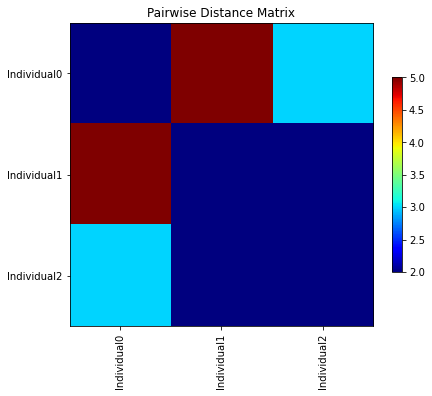

In [14]:
hp.get_pairwise_dist(S2)

Let's say that the 1 allele at genetic variants 1, 2 and 3 is unfavourable in their current environment. Therefore purifying selection will favour the 0 allele which does not have deleterious effects on the individual. Let's simulate 100 generations where the odds are 9 to 1 in favour of the 0 allele for genetic variants 1,2 and 3. 

In [15]:
datam3 = S2.values.copy()

for i in range(100):
    for idx1,idx2,idx3 in np.random.randint([1,0,0],[4,3,2],(1,3)):
        datam3[idx1,idx2,idx3] = np.random.choice([0,1],size=1,p=[0.9,0.1]) 

In [16]:
S2_negative = allel.GenotypeArray(datam3, copy=False)
S2_negative

,0,1,2
0,0/1,0/0,0/0
1,0/0,0/0,0/0
2,0/0,1/0,0/0
3,0/0,0/0,0/1
4,0/1,1/0,0/1


We can visualize the genetic diversity after the effects of purifying selection using pairwise distance matrix.

The mean pairwise distance within the population is 2.0


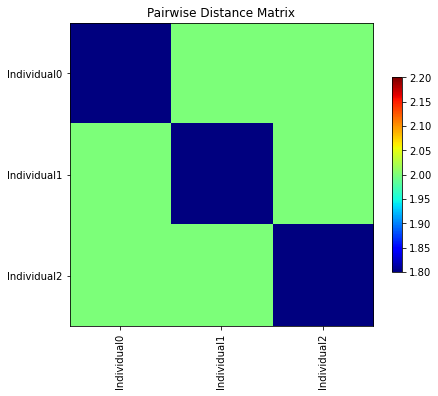

In [17]:
hp.get_pairwise_dist(S2_negative)

As we can see above, the pairwise distances decrease. Thus we can say that there is a **decrease** in genetic diversity due to purifying selection within a population.

# $F_{st}$

While mean pairwise distance can be a good measure of diversity within a population, $F_{st}$ can be used as a metric to compare diversity between two populations. $F_{st}$ more specifically Hudson's $F_{st}$ is defined as:

$F_{st} = \frac{H_b - H_w}{H_b}$

where $H_b$ is the mean pairwise diversity in the metapopulation while $H_w$ is the mean pairwise diversity in each of the subpopulations. 

$F_{st}$ can be calculated using scikit-allel module. 

## Calculating $F_{st}$ between $S_1$ and $S_2$ right after $S_2$ migrated

In [18]:
hp.get_fst(S1,S2)

The F_st value between the two populations is 0.05


## Calculating $F_{st}$ after purifying selection in $S_2$

In [19]:
hp.get_fst(S1,S2_negative)

The F_st value between the two populations is 0.09


## Calculating $F_{st}$ after positive & purifying selection in $S_1$ and $S_2$ respectively 

In [20]:
hp.get_fst(S1_positive,S2_negative)

The F_st value between the two populations is 0.05


The above three calculations are at different timepoints. I have assumed that after genetic drift, the purifying selection occurs in $S_2$ first and it is followed by the positive selection in $S_1$. Right after genetic drift, since the two populations $S_1$ and $S_2$ were a part of the same metapopulation, their $F_{st}$ value can be assumed to be small. After purifying selection in S2 there was a strong favouritism for the 0 allele at multiple genetic variants which resulted in a greater diversity between $S_1$ which remained unchaged and $S_2$ which changed. After positive selection in $S_1$ which also favoured 0 allele at similar genetic variants, the diversity should be reduced as seen in the $F_{st}$ value. 

**It should be noted that the above simulations are hypothetical and the results rely on multiple assumptions. Usually all forces of evolution act together and it is very hard to perceive well-defined signals from the data.** 

# References

1. PSU ANTH/BIOL-460 Class Notes and Lecture Slides
2. Bhatia et. al., Estimating and interpreting FST: The impact of rare variants
3. NIH: https://www.genome.gov/genetics-glossary/
4. Scikit-allel: https://scikit-allel.readthedocs.io/en/stable/
3. Numpy: https://numpy.org/about/
4. Conda: https://docs.conda.io/en/latest/
5. Python: https://www.python.org/

# Additional Definitions

1. <a id='tag7'>Genome</a>: An organisms complete set of DNA. 
2. <a id='tag1'>DNA</a>: DNA is the hereditary material in almost all organisms. It consists of a sequence of four chemical bases. Each base is also attached to a sugar molecule and a phosphate molecule. Together, a base, sugar, and phosphate are called a nucleotide.
3. <a id='tag2'>Gene</a>: A distinct sequence of nucleotides is called a gene. Some gene have instructions to make molecules called proteins. Genes are arranged, one after another, on structures called chromosomes.  
4. <a id='tag3'>SNPs</a>: Single nucleotide polymorphism is a variation in a single nucleotide of a genome.
5. <a id='tag4'>Diploid</a>: A cell or an organism that has a pair of chromosomes is called diploid.
6. <a id='tag5'>Genetic variant</a>: A specified region in the genome that differs between two genomes. 
7. <a id='tag6'>Gene pool</a>: The total genetic diversity found within a population. 
8. <a id='tag8'>Pairwise Distance</a>: There can be a variety of ways to calculate distances between two vectors. Here we refer to Euclidean Distance.
9. <a id='tag9'>Allele</a>: An allele is one of two or more versions of the same gene.

The source code along with the raw ipython notebook is available at: https://github.com/deeprob/BIOL-460-UNESSAY1